##### Título: Regresión Lineal Multivariada: Método de la Matriz Inversa
##### Fecha: 20191108
##### Autor: Dr. Gabriel Guerrero
##### Referencia: gg20191108_RegresionLinealMultivariada_MetodoMatrizInversa.ipynb

Este ejercicio explora cómo realizar una regresión lineal multivariada con TensorFlow utilizando la representación del problema por matrices, conocido como representacion de la matriz inversa.

Supongamos que tenemos datos de medición de n registros (por ejemplo, créditos) con F características o medidas en cada uno de los n registros.

Por ejemplo, tenemos 50 millones de créditos y en cada crédito medimos 10 características numéricas, montos o tasas de interés. 

En este caso, n=50,000,000 y F=10

El problema es determinar un modelo matemático que mejor aproxime la ubicación de los puntos.

Este es el problema tradicional de la regresión lineal multivariada.

Para resolver este problema se calcula en cada uno de los n puntos la distancia al hiperplano de dimensión F. 

Si F=1 es la regresion lineal de puntos y la recta, si F=2 es la regresión lineal de puntos y el plano, ....

Sin entrar en detalles matemáticos de la minimización de la función de error y la derivada por cada variable de esta función, denominado Gradiente, este problema es equivalente a la ecuación lineal con matrices siguiente:

Dado el sistema $ A \cdot x = y $, la forma inversa de matriz de regresión lineal multivariada se resolve para x de la siguiente manera:

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$

Como recordatorio aquí, $x$ es nuestra matriz de parámetros (vector de longitud $F+1$, donde $F$ es el número de características y es el número de muestras). Aquí, $A$, nuestro diseño de la matriz toma forma.

$$
A=
\begin{bmatrix}
    1 & x_{11} & x_{12} & \dots  & x_{1F} \\
    1 & x_{21} & x_{22} & \dots  & x_{2F} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n1} & x_{n2} & \dots  & x_{nF}
\end{bmatrix}
$$

Donde $F$ es el número de características independientes, y $n$ es el número de puntos. Para un sistema sobredeterminado, $n>F$. Recuerde que un punto observado en nuestro sistema tendrá una longitud de $F+1$ y el punto $i^{th}$ se verá como

$$point_{i} = \left( y_{i}, x_{i1}, x_{i2}, \dots, x_{iF} \right)$$

Para este ejemplo, consideraremos sólo un sistema bidimensional ($F=1$), de modo que podamos trazar los resultados al final en una gráfica.

La metodología que utilizamos contiene los siguientes pasos:

### Metodología: 

#### Paso 1: Cargar bibliotecas del ambiente Python

#### Paso 2: Cargar bibliotecas del ambiente TensorFlow

#### Paso 3: Prender la Máquina Tensorial del ambiente TensorFlow

#### Paso 4: Leer los datos del problema

#### Paso 5: Preparación de los datos del problema, en su forma Matricial

#### Paso 6: Meter los datos del problema a la Máquina de Cálculo TensorFlow

#### Paso 7: Definir el problema por medio de cálculos por realizar en la Máquina de Cálculo TensorFlow

#### Paso 8: Ejecutar los cálculos por medio de la Máquina de Cálculo TensorFlow

#### Paso 9: Extraer los resultados de los cálculos generados por la Máquina de Cálculo TensorFlow

#### Paso 10: Desplegar los resultados de los cálculos generados por la Máquina de Cálculo TensorFlow



#### Paso 1: Cargar bibliotecas del ambiente Python

Comenzamos cargando las bibliotecas necesarias.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np


#### Paso 2: Cargar bibliotecas del ambiente TensorFlow

En ambiente TensorFlow es una máquina de cálculo matricial ofrecida desde 2015  por Google


In [2]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

#### Paso 3: Prender la Máquina Tensorial del ambiente TensorFlow

A continuación comenzamos una sesión del grafo que genera la Máquina Tensorial TensorFlow.

In [3]:
sess = tf.Session()

Para fines de ilustración, se generan  datos al azar como puntos para encontrar la mejor recta, es decir estamos en el problema regresión lineal simple.

Tenemos n=100 y F=1. Es decir, tenemos 100 medidas de un fenómeno y queremos encontrar la mejor aproximación por medio de una recta, en donde el error global, se define como la suma de los errores en cada punto. Deseamos que el error global sea el menor. 

#### Paso 4: Leer los datos del problema

En este ejemplo, se generan 100 valores de forma aleatoria.

Los valores de x serán una secuencia de 100 valores espaciados uniformemente entre 0 y 100.



#### Crear los datos de forma aleatoria 
#### Se utilizan herramientas de Python y su biblioteca Numpy

Para la generacion de las muestras x utilizamos la función:

numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)


Regresa num  muestras dentro del  intervalo (start, stop). En el caso presente, deseamos 100 muestras en el intervalo (10, 100)

Para las muestras de y utilizamos una distribución normal

numpy.random.normal(loc=0.0, scale=1.0, size=None)



In [4]:
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [5]:
x_vals
x_vals.shape

(100,)

In [6]:
y_vals
y_vals.shape

(100,)

Se muestran graficamente los datos del problema de la regresión lineal simple

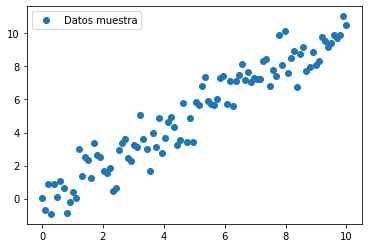

In [7]:
# Mostrar los datos de la muestra gráficamente
plt.plot(x_vals, y_vals, 'o', label='Datos muestra')
plt.legend(loc='upper left')
plt.show()

#### Paso 5: Preparación de los datos del problema, en su forma Matricial

Creamos la matriz de diseño $A$, que será una columna de unos y los valores de x.

In [8]:
# Crear matriz de diseño
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))

In [9]:
x_vals_column.shape

(100, 1)

In [10]:
A.shape

(100, 2)

Ahora creamos los valores de y como una matriz con Numpy.

Una vez que tenemos los valores de y y la matriz de diseño, creamos tensores a partir de ellos.

In [11]:
y = np.transpose(np.matrix(y_vals))

In [12]:
y.shape

(100, 1)

#### Paso 6: Meter los datos del problema a la Máquina de Cálculo TensorFlow

In [13]:
# Crear los tensores en TensorFlow
A_tensor = tf.constant(A)
y_tensor = tf.constant(y)

In [14]:
A_tensor.shape

TensorShape([Dimension(100), Dimension(2)])

In [15]:
y_tensor.shape

TensorShape([Dimension(100), Dimension(1)])

#### Paso 7: Definir el problema por medio de cálculos por realizar en la Máquina de Cálculo TensorFlow

Ahora resolvemos la matriz de parámetros con operaciones TensorFlow.

$$x = \left( A^{T} \cdot A \right)^{-1} \cdot A^{T} \cdot y$$

In [16]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A.shape

TensorShape([Dimension(2), Dimension(2)])

In [17]:
tA_A_inv = tf.matrix_inverse(tA_A)
tA_A_inv.shape

TensorShape([Dimension(2), Dimension(2)])

In [18]:
producto = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
producto.shape

TensorShape([Dimension(2), Dimension(100)])

In [19]:
y_tensor.shape

TensorShape([Dimension(100), Dimension(1)])

In [20]:
EcuacionSolucion = tf.matmul(producto, y_tensor)
EcuacionSolucion.shape

TensorShape([Dimension(2), Dimension(1)])

#### Paso 8: Ejecutar los cálculos por medio de la Máquina de Cálculo TensorFlow

Ejecutar las soluciones 

In [21]:
CalculoSolucion = sess.run(EcuacionSolucion)


#### Paso 9: Extraer los resultados de los cálculos generados por la Máquina de Cálculo TensorFlow

Obtener la pendiente y la ordenada al origen.

In [22]:
PendienteRecta = CalculoSolucion[0][0]
OrdenadaAlOrigen = CalculoSolucion[1][0]

#### Paso 10: Desplegar los resultados de los cálculos generados por la Máquina de Cálculo TensorFlow

Ahora imprimimos la solución encontrada

In [23]:
print('pendiente de la recta: ' + str(PendienteRecta))
print('ordenada al origen: ' + str(OrdenadaAlOrigen))

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(PendienteRecta*i + OrdenadaAlOrigen)

pendiente de la recta: 1.0463468178578093
ordenada al origen: -0.10237531220187332


Usamos la bliblioteca Python Matplotlib, para desplegar los resultados.

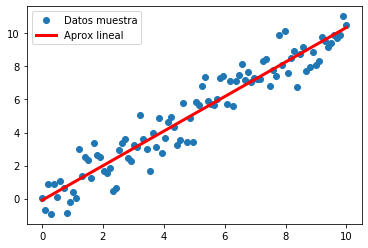

In [24]:
# Mostrar resultados gráficamente
plt.plot(x_vals, y_vals, 'o', label='Datos muestra')
plt.plot(x_vals, best_fit, 'r-', label='Aprox lineal', linewidth=3)
plt.legend(loc='upper left')
plt.show()